### Tarea 3

##### Se implementará un código que sea capaz de resolver la ecuación de Laplace para unas condiciones de frontera específicas en el borde. Esto se logrará al establecer una matriz de dimensiones NxM, donde se especifique un valor arbritrario de potencial, el cual irá cambiando al promediar con sus valores vecinos, iniciando por el borde hasta cambiar los valores de la matriz a un potencial que no cambie de forma abrupta. 

In [11]:
#Importación de librerias necesarias para la implementación del código

import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Inicialmente, se establece una función que reciba por parámetro las variables conocidas.

def laplace(v_0, N, M, step):
    """
    La función crea un array con valores de potencial arbitrarios para cada posición.
    Además de establecer en la frontera de este array los valores específicos del potencial
    conocido. Posteriormente, realizará cambios en cada posición de la matriz, asignando 
    valores correspondientes al promedio de los vecinos de dicha posición. 

    Args:
        v_0 (list): La lista contiene los valores de potencial para cada frontera. El elemento
                    0 corresponde al plano x=0, el elemento 1 se refiere a el plano x=a, el 
                    elemnto 2 es y=0 y finalmente el elemento 3 corresponde al plano y=b
        N (int): Número de filas de la mariz en la que se establecerán los puntos.
        M (int): Número de columnas de la matriz en la que se establecen los puntos.
        step (int): Dado que dx=dy, corresponde a la separación entre puntos del arreglo, los 
                    cuales en la forma teórica son representados por dx y dy. 
    
    Return:
        int: Solución de la ecuación de Laplace en donde el valor del potencial no varia de forma
             significativa.

    """
    #Para iniciar, se establecerán los puntos conocido en la red
    V = np.zeros((N,M))
    
    #Definimos condiciones en el borde
    V[0,:] = v_0[0] #plano x=0
    V[-1,:] = v_0[1] #plano x=N
    V[:,0] = v_0[2] #plano y=0
    V[:,-1] = v_0[3] #plano y=M
    
    a = N*step
    b = M*step
    
    x = np.linspace(0,a,N)
    y = np.linspace(0,b,M)
    
    #Ahora se realizará el algoritmo que cálcula el promedio de los vecinos.
    #Será necesario hacer que este se detenga una vez el valor de V no cambie significativamnete
    change = 0.00001 #Establecemos una precisión en el cálculo para que el valor se estabilice
    iterations = 10000 #Cantidad de iteraciones
    diff_ini = 0 #Se define una diferencia inicial
    
    for k in range(iterations):
        for i in range(1,N-1):
            for j in range(1,M-1):
                #Aplicamos metodo de relajación
                old_v = V[i,j]
                V[i,j] = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
                
                #Vemos cual es la diferencia para este punto
                diff = abs(V[i,j] - old_v)
                
                #Se redefine la nueva diferencia
                if diff > diff_ini:
                    diff_i = diff
                
        #Si la diferencia es menor a la presición impuesta, entonces que no siga con las iteraciones.
        if diff_i < change:
            break
    
    return V,x,y



In [15]:
#Establecemos valores de prueba normalmente usados
v_0 = [0,0,-1,1]
N = 100
M = 100
dx = 0.1

#Se extrae el resultado
V = laplace(v_0, N, M, dx)[0]
x = laplace(v_0, N, M, dx)[1]
y = laplace(v_0, N, M, dx)[2]

print(V)

[[-1.          0.          0.         ...  0.          0.
   1.        ]
 [-1.         -0.49808095 -0.29853765 ...  0.29851527  0.49808095
   1.        ]
 [-1.         -0.69383107 -0.49241319 ...  0.49236879  0.69383107
   1.        ]
 ...
 [-1.         -0.6941385  -0.49302024 ...  0.49298085  0.6941385
   1.        ]
 [-1.         -0.4982452  -0.29886194 ...  0.2988423   0.4982452
   1.        ]
 [-1.          0.          0.         ...  0.          0.
   1.        ]]


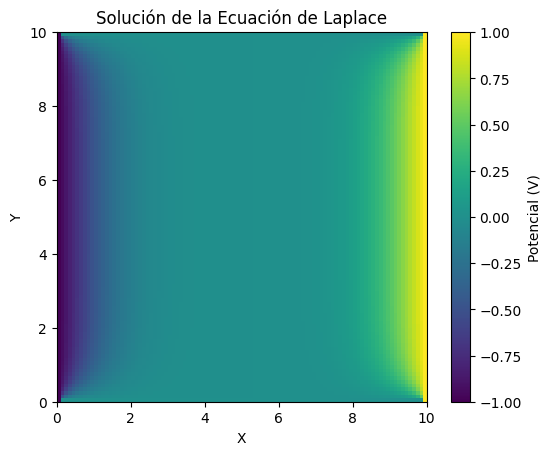

<Figure size 640x480 with 0 Axes>

In [17]:
#Se obtiene la longitud de la caja para hacer el diagrama
a = N*dx
b = M*dx

#Creación del diagrama
plt.imshow(V, origin='lower', cmap='viridis', extent=[0, a, 0, b])
plt.colorbar(label='Potencial (V)')
plt.title('Solución de la Ecuación de Laplace')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.savefig("Prueba_1")

[[-15.           0.           0.         ...   0.           0.
   15.        ]
 [-15.          -7.49269827  -4.52063291 ...   4.52057736   7.49268141
   15.        ]
 [-15.         -10.45020358  -7.47087978 ...   7.4707686   10.45016977
   15.        ]
 ...
 [-15.         -10.45083986  -7.47214781 ...   7.4720236   10.45079804
   15.        ]
 [-15.          -7.49302688  -4.52128779 ...   4.52122555   7.4930059
   15.        ]
 [-15.           0.           0.         ...   0.           0.
   15.        ]]


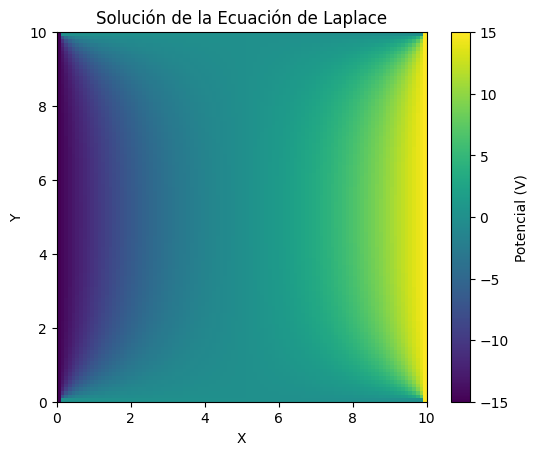

<Figure size 640x480 with 0 Axes>

In [20]:
#Realización de una segund prueba con otros valores 
v_0_2 = [0,0,-15,15]
N_2 = 100
M_2 = 100
dx_2 = 0.1

#Se extrae el resultado
V_2 = laplace(v_0_2, N_2, M_2, dx_2)[0]
x_2 = laplace(v_0_2, N_2, M_2, dx_2)[1]
y_2 = laplace(v_0_2, N_2, M_2, dx_2)[2]

print(V_2)

a_2 = N_2*dx_2
b_2 = M_2*dx_2

#Creación del diagrama
plt.imshow(V_2, origin='lower', cmap='viridis', extent=[0, a_2, 0, b_2])
plt.colorbar(label='Potencial (V)')
plt.title('Solución de la Ecuación de Laplace')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.savefig("Prueba_2")